In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import linregress

In [12]:
data_filename = "Temperatures.csv"
data = pd.read_csv(data_filename, delimiter=",", names=["Time [s]", "Temperature [C]"])
xlabel, ylabel = data.columns

Text(0.5, 1.0, 'Temperature vs. Time')

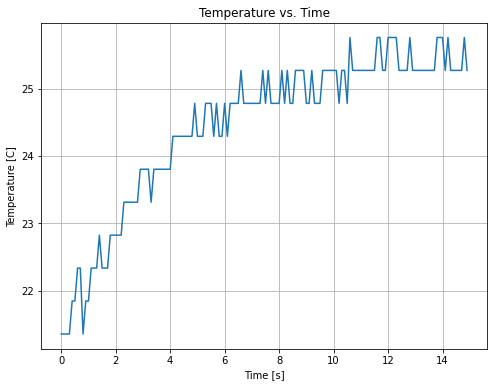

In [20]:
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(1, 1, 1)
ax.plot(data[xlabel], data[ylabel])
ax.grid()
ax.set_xlabel(xlabel)
ax.set_ylabel(ylabel)
ax.set_title("Temperature vs. Time")

In [46]:
times = [0, 5, 14.8]
temps = []
for t in times:
    temp = float(data[data[xlabel]==t][ylabel])
    temps.append(temp)
    print(f"T({t}s)={temp:.6f}C.")

T(0s)=21.358749C.
T(5s)=24.291300C.
T(14.8s)=25.757576C.


In [47]:
tau = -times[1]/np.log((temps[1]-temps[2])/(temps[0]-temps[2]))
print(f"τ={tau:.6f}")

τ=4.551196


In [90]:
scale = 1.0  # account for negative in log??
error = (data[ylabel]-scale*temps[2])/(temps[0]-scale*temps[2])

In [129]:
t_start = 0.8
t_end = 9.2
locs = (data[xlabel]>t_start) & (data[xlabel]<t_end)
fit_log = linregress(data[locs][xlabel], np.log(error[locs]))
fit_log
-1/fit_log.slope

4.530595493794422

C:\Users\Luke A Sargen\Anaconda3\envs\uas\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Text(0.5, 1.0, 'ln(Temperature) vs. Time')

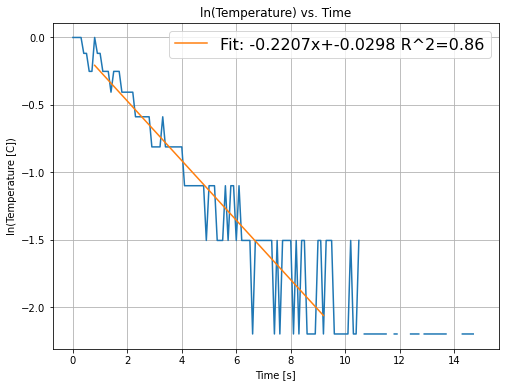

In [134]:
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(1, 1, 1)
ax.plot(data[xlabel], np.log(error))

fake_x = np.linspace(t_start, t_end, 100)
fit_y = fit_log.slope*fake_x+fit_log.intercept
ax.plot(fake_x, fit_y, label=f"Fit: {fit_log.slope:.4f}x+{fit_log.intercept:.4f} R^2={fit_log.rvalue**2:.2f}")

ax.grid()
ax.legend(prop={'size': 16})
ax.set_xlabel(xlabel)
ax.set_ylabel("ln("+ylabel+")")
ax.set_title("ln(Temperature) vs. Time")